# Exploring the explanatory variables

When the response variable is logical, all the points lie on the y = 0 and  y = 1 lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

You will use these histograms to get to know the financial services churn dataset seen in the video.

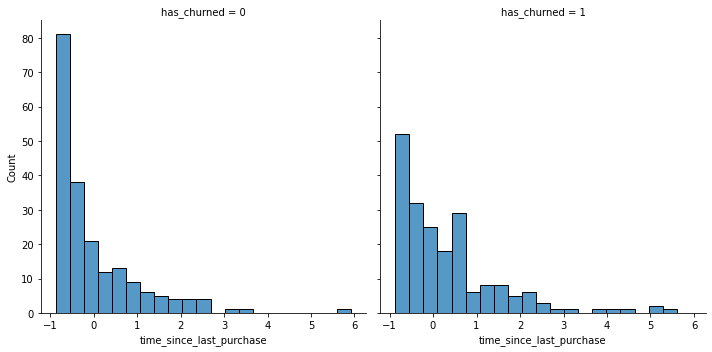

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn = pd.read_csv("dataset/churn.csv")
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x = "time_since_last_purchase", col = "has_churned")

plt.show()

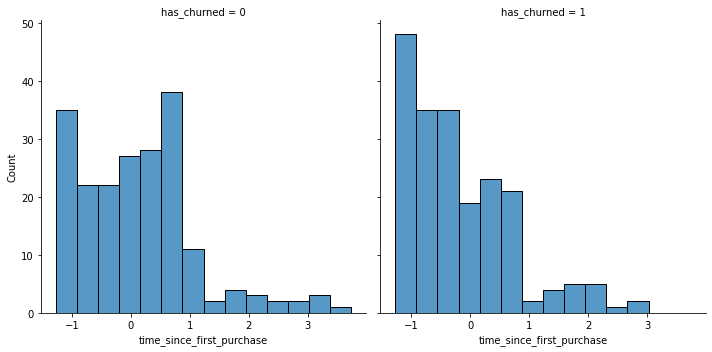

In [3]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn, x = "time_since_first_purchase", col = "has_churned")

plt.show()


# Visualizing linear and logistic models

As with linear regressions, `regplot()` will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

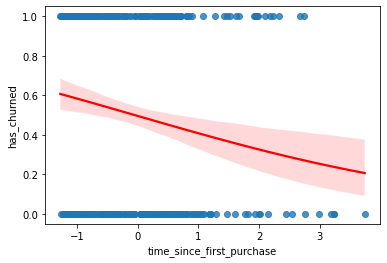

In [4]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data = churn,
x= "time_since_first_purchase",
y = "has_churned",
            line_kws={"color": "red"},
            logistic = True)

plt.show()

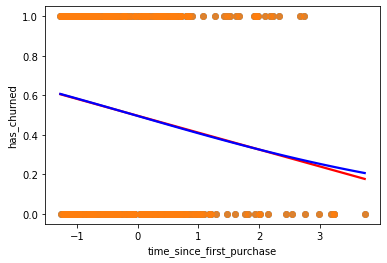

In [5]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            logistic = True,
            line_kws={"color": "blue"})
plt.show()

# Logistic regression with logit()

Logistic regression requires another function from `statsmodels.formula.api`: `logit()`. It takes the same arguments as `ols()`: a formula and data argument. You then use `.fit()` to fit the model to the data.

Here, you'll model how the length of relationship with a customer affects churn.

In [6]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset

mdl_churn_vs_relationship = logit(" has_churned ~ time_since_first_purchase", data = churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


# Probabilities

There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

In [11]:
import numpy as np
explanatory_data = pd.DataFrame(
{"time_since_first_purchase": np.arange(-1.5, 4.0, 0.25)})

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.25     0.605470
2                      -1.00     0.584096
3                      -0.75     0.562401
4                      -0.50     0.540465


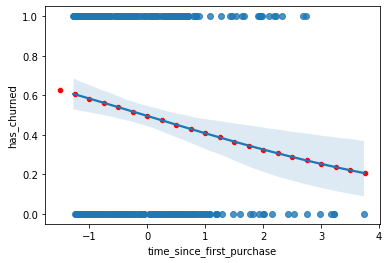

In [12]:
fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot( x = "time_since_first_purchase", y = "has_churned",
data = churn, logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot( x = "time_since_first_purchase", y = "has_churned",
data = prediction_data, color ="red")

plt.show()

# Most likely outcome

When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

In [13]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.25     0.605470                  1.0
2                      -1.00     0.584096                  1.0
3                      -0.75     0.562401                  1.0
4                      -0.50     0.540465                  1.0


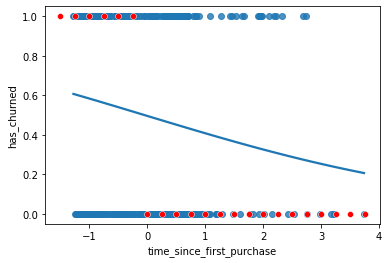

In [14]:

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
            y="most_likely_outcome",
            data=prediction_data,
            color = "red")

plt.show()

# Odds ratio

Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

In [15]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"]/ (1- prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.25     0.605470                  1.0    1.534661
2                      -1.00     0.584096                  1.0    1.404400
3                      -0.75     0.562401                  1.0    1.285197
4                      -0.50     0.540465                  1.0    1.176111


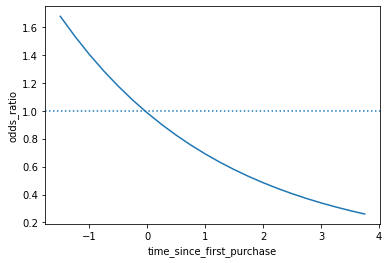

In [16]:

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = "time_since_first_purchase", y= "odds_ratio", data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

# Log odds ratio

One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

In [17]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"]= np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.25     0.605470                  1.0    1.534661   
2                      -1.00     0.584096                  1.0    1.404400   
3                      -0.75     0.562401                  1.0    1.285197   
4                      -0.50     0.540465                  1.0    1.176111   

   log_odds_ratio  
0        0.517008  
1        0.428309  
2        0.339610  
3        0.250912  
4        0.162213  


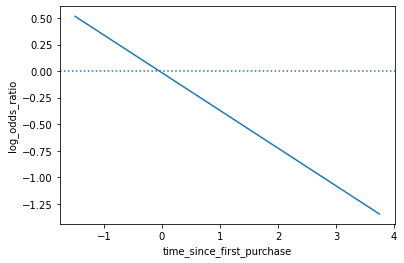

In [18]:

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

# Calculating the confusion matrix

A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

In [19]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response":actual_response,
                         "predicted_response":predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


# Drawing a mosaic plot of the confusion matrix

While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the `.pred_table()` method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the `mosaic()` function.

[[112.  88.]
 [ 76. 124.]]


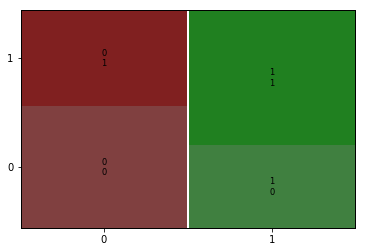

In [20]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

# Accuracy, sensitivity, specificity

Lots of performance metrics can be computed from a confusion matrix. For logistic regression, three of them in particular are important: accuracy, sensitivity, and specificity. Can you identify what each of those terms mean in the context of the churn model?

<center><img src="images/04.01.png"  style="width: 400px, height: 300px;"/></center>

# Measuring logistic model performance

Several metrics exist for measuring the performance of a logistic regression model. In this last exercise, you'll manually calculate accuracy, sensitivity, and specificity. 

In [21]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
